In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scape
import katdal
import katpoint
import katsdpscripts
import glob
import re
import pandas as pd 

import csv
import operator

INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/Grammar.txt
INFO: Generating grammar tables from /usr/lib/python2.7/lib2to3/PatternGrammar.txt


In [3]:
from os import system

In [4]:
print "Scape version: %s"%scape.__version__
print "katdal version: %s"%katdal.__version__
print "katpoint version: %s"%katpoint.__version__
print "katsdpscripts version: %s"%katsdpscripts.__version__

Scape version: 0.1.dev616+master.e836eb2
katdal version: 0.9.6.dev636+master.ea5b75e
katpoint version: 0.8.dev355+master.341001f
katsdpscripts version: 0.1.dev2714+master.9a3f2f2


In [5]:
h5_filename ='/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/02/27/1519773550.h5'
%set_env h5_filename = $h5_filename

env: h5_filename=/var/kat/archive3/data/MeerKATAR1/telescope_products/2018/02/27/1519773550.h5


In [6]:
d = katdal.open(h5_filename);
ant_list,ants = [],[]
[ant_list.append(ant.name) for ant in d.ants]
print(ant_list)

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1519731275.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
DEBUG: Added '0408-658' [radec] (and 1 aliases)
DEBUG: Added '0537-441' [radec] (and 1 aliases)
DEBUG: Added '0614-349' [radec] (and 1 aliases)
DEBUG: Added '0723-008' [radec] (and 1 aliases)
DEBUG: Added '0733-174' [radec] (and 1 aliases)
DEBUG: Added '0823-500' [radec] (and 1 aliases)
DEBUG: Added '3C237' [radec] (and 1 aliases)
DEBUG: Added '1127-145' [radec] (and 1 aliases)
DEBUG: Added '1148-001' [radec] (and 1 aliases)
DEBUG: Added '3C286' [radec] (and 1 aliases)
DEBUG: Added '1334-127' [radec] (and 1 aliases)
DEBUG: Added '1345+125' [radec] (and 1 aliases)
DEBUG: Added 

In [7]:
#ant_list.remove('m020') # not tracking most of the time
ants=','.join(ant_list)
print ants
%set_env ants=$ants

m003,m007,m010,m011,m012,m013,m015,m032,m037,m039,m040,m043,m044,m047,m050,m052
env: ants=m003,m007,m010,m011,m012,m013,m015,m032,m037,m039,m040,m043,m044,m047,m050,m052


In [8]:
ref_ant='m012'
%set_env ref_ant=$ref_ant

env: ref_ant=m012



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1519731275.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (16): m003, m007, m010, m011, m012 (*ref*), m013, m015, m032, m037, m039, m040, m043, m044, m047, m050, m052 [pol H]
baselines (120): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 7-15 8-15 9-15 10-15 

scan  19 (  15 samples) 0.090 0.081 0.073 0.075 0.052 0.094 0.074 0.066 0.072 0.039 0.076 0.094 0.050 0.080 0.045 0.089 0.080 0.075 0.053 0.067 0.086 0.111 0.101 0.090 0.102 0.099 0.103 0.089 0.095 0.090 0.076 0.094 0.079 0.082 0.077 0.097 0.090 0.084 0.094 0.087 0.101 0.080 0.093 0.056 0.083 0.097 0.099 0.092 0.081 0.085 0.093 0.065 0.087 0.093 0.100 0.075 0.076 0.077 0.083 0.081 0.075 0.069 0.039 0.079 0.031 0.053 0.039 0.082 0.096 0.084 0.087 0.097 0.101 0.092 0.096 0.081 0.013 0.017 0.013 0.014 0.014 0.020 0.014 0.074 0.021 0.062 0.114 0.109 0.070 0.020 0.099 0.074 0.094 0.095 0.086 0.067 0.112 0.013 0.078 0.088 0.091 0.078 0.095 0.014 0.084 0.083 0.049 0.097 0.013 0.082 0.078 0.100 0.014 0.085 0.096 0.014 0.081 0.013 0.072 0.040 '3C286'
scan  20 (   6 samples) skipped 'slew'
scan  21 (  15 samples) 0.111 0.122 0.111 0.114 0.102 0.098 0.113 0.105 0.108 0.083 0.122 0.111 0.111 0.105 0.097 0.113 0.122 0.111 0.095 0.110 0.109 0.126 0.109 0.117 0.114 0.117 0.117 0.108 0.121 0.119 0.109

scan  41 (  16 samples) 0.058 0.061 0.055 0.058 0.053 0.057 0.057 0.061 0.060 0.062 0.057 0.057 0.057 0.054 0.061 0.053 0.056 0.053 0.054 0.053 0.053 0.058 0.059 0.057 0.056 0.059 0.057 0.055 0.054 0.059 0.059 0.058 0.055 0.058 0.051 0.057 0.060 0.063 0.057 0.061 0.059 0.057 0.060 0.059 0.059 0.057 0.058 0.056 0.054 0.057 0.056 0.059 0.058 0.060 0.059 0.056 0.059 0.057 0.061 0.059 0.059 0.058 0.056 0.058 0.058 0.060 0.057 0.060 0.060 0.057 0.061 0.059 0.061 0.060 0.062 0.061 0.057 0.060 0.059 0.064 0.059 0.062 0.061 0.062 0.057 0.056 0.058 0.055 0.058 0.057 0.059 0.058 0.059 0.056 0.058 0.059 0.060 0.061 0.057 0.058 0.058 0.059 0.060 0.060 0.056 0.058 0.057 0.061 0.060 0.056 0.059 0.059 0.059 0.055 0.061 0.061 0.057 0.061 0.056 0.052 '1148-001'
scan  42 (   6 samples) skipped 'slew'
scan  43 (  15 samples) 0.012 0.013 0.013 0.012 0.013 0.012 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.013 0.013 0.013 0.013 0.012 0.012 0.012 0.012 0.

scan  63 (  15 samples) 0.098 0.112 0.098 0.092 0.090 0.094 0.089 0.098 0.098 0.074 0.105 0.102 0.101 0.083 0.085 0.094 0.100 0.102 0.106 0.101 0.096 0.116 0.106 0.116 0.118 0.109 0.121 0.106 0.114 0.108 0.109 0.097 0.094 0.089 0.106 0.109 0.103 0.091 0.092 0.094 0.093 0.103 0.116 0.113 0.106 0.111 0.111 0.114 0.111 0.119 0.112 0.100 0.115 0.112 0.116 0.109 0.100 0.117 0.137 0.120 0.113 0.118 0.127 0.109 0.134 0.114 0.114 0.116 0.106 0.117 0.111 0.110 0.118 0.119 0.104 0.111 0.074 0.089 0.073 0.080 0.091 0.108 0.107 0.103 0.114 0.112 0.118 0.114 0.109 0.103 0.109 0.120 0.112 0.112 0.115 0.109 0.120 0.079 0.115 0.109 0.121 0.109 0.107 0.087 0.116 0.133 0.118 0.118 0.085 0.106 0.116 0.117 0.080 0.109 0.113 0.087 0.112 0.081 0.117 0.119 '1148-001'
scan  64 (   6 samples) skipped 'slew'
scan  65 (  15 samples) 0.056 0.064 0.078 0.088 0.056 0.062 0.068 0.074 0.053 0.050 0.078 0.077 0.051 0.073 0.062 0.065 0.074 0.057 0.047 0.052 0.067 0.081 0.063 0.070 0.061 0.068 0.081 0.061 0.087 0.086 0.

scan  85 (  15 samples) 0.025 0.026 0.025 0.024 0.025 0.024 0.027 0.026 0.024 0.024 0.025 0.025 0.026 0.025 0.025 0.024 0.025 0.024 0.023 0.024 0.023 0.025 0.025 0.025 0.025 0.025 0.025 0.024 0.025 0.025 0.026 0.026 0.026 0.026 0.025 0.024 0.026 0.027 0.027 0.027 0.026 0.026 0.026 0.025 0.025 0.024 0.025 0.025 0.023 0.025 0.025 0.027 0.026 0.027 0.026 0.024 0.025 0.025 0.026 0.025 0.026 0.025 0.024 0.024 0.025 0.026 0.025 0.026 0.027 0.025 0.026 0.025 0.027 0.026 0.028 0.027 0.025 0.027 0.025 0.027 0.025 0.027 0.027 0.027 0.024 0.024 0.026 0.023 0.025 0.024 0.026 0.025 0.025 0.025 0.025 0.026 0.026 0.026 0.024 0.025 0.027 0.025 0.026 0.026 0.026 0.026 0.025 0.028 0.027 0.024 0.025 0.027 0.026 0.024 0.028 0.027 0.025 0.026 0.024 0.023 '3C237'
scan  86 (   5 samples) skipped 'slew'
scan  87 (  16 samples) 0.029 0.032 0.032 0.030 0.030 0.030 0.030 0.032 0.031 0.030 0.029 0.029 0.031 0.029 0.030 0.028 0.028 0.029 0.029 0.029 0.029 0.031 0.032 0.032 0.031 0.031 0.031 0.029 0.029 0.030 0.030

scan 107 (  15 samples) 0.062 0.065 0.068 0.056 0.060 0.051 0.065 0.073 0.046 0.042 0.075 0.079 0.048 0.060 0.053 0.079 0.061 0.069 0.054 0.056 0.061 0.072 0.070 0.066 0.059 0.061 0.058 0.058 0.067 0.073 0.076 0.079 0.065 0.073 0.060 0.076 0.070 0.068 0.062 0.062 0.049 0.064 0.069 0.052 0.048 0.064 0.053 0.054 0.063 0.076 0.055 0.081 0.077 0.069 0.074 0.074 0.075 0.079 0.070 0.072 0.076 0.069 0.068 0.085 0.066 0.074 0.074 0.062 0.077 0.070 0.080 0.084 0.077 0.077 0.059 0.076 0.064 0.057 0.063 0.065 0.083 0.082 0.084 0.086 0.084 0.079 0.077 0.070 0.074 0.074 0.070 0.084 0.064 0.054 0.072 0.079 0.069 0.069 0.071 0.062 0.082 0.081 0.064 0.073 0.076 0.066 0.077 0.067 0.068 0.071 0.074 0.070 0.073 0.077 0.075 0.067 0.068 0.067 0.079 0.073 '1827-360'
scan 108 (   3 samples) skipped 'slew'
scan 109 (  15 samples) 0.072 0.099 0.090 0.101 0.082 0.065 0.096 0.110 0.058 0.056 0.103 0.112 0.076 0.089 0.077 0.107 0.104 0.073 0.073 0.056 0.072 0.107 0.112 0.126 0.112 0.110 0.103 0.100 0.112 0.114 0.

scan 129 (  15 samples) 0.089 0.087 0.099 0.092 0.092 0.085 0.097 0.106 0.088 0.068 0.114 0.114 0.089 0.101 0.071 0.114 0.109 0.107 0.081 0.083 0.085 0.108 0.120 0.135 0.115 0.121 0.123 0.111 0.134 0.139 0.118 0.110 0.109 0.078 0.091 0.110 0.125 0.102 0.099 0.088 0.089 0.103 0.104 0.088 0.093 0.105 0.103 0.098 0.123 0.138 0.105 0.104 0.130 0.131 0.123 0.106 0.107 0.113 0.127 0.109 0.137 0.133 0.114 0.104 0.138 0.202 0.229 0.102 0.104 0.102 0.110 0.099 0.111 0.136 0.107 0.134 0.038 0.061 0.035 0.039 0.079 0.099 0.117 0.092 0.116 0.102 0.106 0.105 0.117 0.458 0.104 0.101 0.097 0.102 0.130 0.120 0.101 0.070 0.137 0.109 0.141 0.132 0.111 0.086 0.117 0.150 0.165 0.113 0.064 0.102 0.139 0.108 0.057 0.106 0.104 0.060 0.107 0.039 0.110 0.108 '1709-281'
scan 130 (   5 samples) skipped 'slew'
scan 131 (  15 samples) 0.038 0.038 0.043 0.040 0.042 0.038 0.039 0.040 0.043 0.040 0.043 0.043 0.038 0.044 0.038 0.043 0.039 0.035 0.039 0.033 0.032 0.041 0.043 0.037 0.041 0.040 0.038 0.035 0.044 0.042 0.

scan 151 (  15 samples) 0.094 0.082 0.033 0.051 0.061 0.080 0.051 0.068 0.081 0.031 0.054 0.073 0.091 0.039 0.044 0.061 0.075 0.085 0.083 0.076 0.087 0.084 0.073 0.072 0.080 0.081 0.082 0.081 0.045 0.072 0.083 0.032 0.031 0.020 0.081 0.084 0.042 0.028 0.097 0.076 0.092 0.088 0.069 0.075 0.081 0.074 0.071 0.088 0.066 0.059 0.075 0.085 0.048 0.048 0.043 0.075 0.077 0.056 0.047 0.085 0.071 0.084 0.072 0.072 0.074 0.076 0.052 0.079 0.073 0.070 0.050 0.076 0.072 0.037 0.078 0.059 0.022 0.012 0.027 0.048 0.056 0.049 0.017 0.058 0.015 0.046 0.067 0.078 0.058 0.018 0.077 0.078 0.087 0.082 0.070 0.084 0.085 0.035 0.049 0.073 0.038 0.084 0.080 0.048 0.050 0.057 0.077 0.092 0.043 0.061 0.079 0.067 0.030 0.053 0.072 0.035 0.053 0.033 0.047 0.032 '3C286'
scan 152 (   7 samples) skipped 'slew'
scan 153 (  15 samples) 0.110 0.090 0.089 0.093 0.100 0.101 0.101 0.101 0.093 0.076 0.093 0.095 0.090 0.093 0.077 0.091 0.102 0.097 0.093 0.103 0.099 0.102 0.123 0.112 0.112 0.122 0.119 0.117 0.090 0.100 0.111

scan 173 (  15 samples) 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.012 0.012 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.012 0.011 0.010 0.011 0.010 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.011 0.011 0.011 0.010 0.012 0.012 0.011 0.011 0.011 0.010 '1934-638'
scan 174 (  10 samples) skipped 'slew'
scan 175 (  15 samples) 0.032 0.032 0.032 0.031 0.031 0.031 0.031 0.032 0.033 0.031 0.031 0.032 0.031 0.031 0.031 0.030 0.031 0.031 0.030 0.032 0.030 0.032 0.033 0.032 0.033 0.034 0.032 0.031 0.031 0.031 0.

scan 195 (  15 samples) 0.023 0.023 0.023 0.023 0.023 0.023 0.024 0.023 0.023 0.023 0.023 0.023 0.023 0.023 0.023 0.022 0.022 0.022 0.022 0.023 0.022 0.023 0.023 0.023 0.023 0.023 0.022 0.022 0.023 0.023 0.023 0.023 0.023 0.023 0.022 0.023 0.024 0.024 0.023 0.024 0.023 0.023 0.024 0.024 0.023 0.022 0.023 0.022 0.022 0.022 0.022 0.023 0.023 0.024 0.023 0.023 0.023 0.023 0.024 0.023 0.024 0.023 0.022 0.023 0.022 0.024 0.022 0.024 0.024 0.023 0.024 0.024 0.025 0.023 0.024 0.024 0.023 0.024 0.023 0.024 0.023 0.024 0.024 0.024 0.022 0.022 0.023 0.022 0.023 0.023 0.023 0.023 0.023 0.023 0.023 0.023 0.024 0.024 0.022 0.022 0.023 0.023 0.024 0.023 0.023 0.024 0.023 0.024 0.024 0.022 0.023 0.024 0.023 0.022 0.024 0.024 0.023 0.023 0.022 0.021 '1827-360'
scan 196 (   4 samples) skipped 'slew'
scan 197 (  15 samples) 0.049 0.041 0.050 0.039 0.045 0.045 0.042 0.046 0.042 0.032 0.051 0.045 0.043 0.036 0.033 0.040 0.058 0.045 0.046 0.044 0.042 0.050 0.053 0.053 0.050 0.047 0.050 0.046 0.054 0.049 0.

scan 217 (  16 samples) 0.023 0.023 0.024 0.023 0.024 0.024 0.024 0.024 0.024 0.023 0.024 0.023 0.023 0.023 0.023 0.022 0.023 0.023 0.023 0.023 0.023 0.023 0.024 0.024 0.023 0.024 0.023 0.023 0.023 0.023 0.023 0.023 0.024 0.023 0.022 0.023 0.025 0.024 0.024 0.025 0.024 0.023 0.024 0.024 0.023 0.023 0.023 0.023 0.022 0.023 0.022 0.024 0.025 0.025 0.025 0.024 0.025 0.025 0.026 0.024 0.026 0.025 0.024 0.026 0.026 0.027 0.024 0.024 0.025 0.025 0.025 0.025 0.026 0.024 0.025 0.025 0.026 0.027 0.026 0.028 0.027 0.027 0.026 0.028 0.024 0.024 0.024 0.023 0.023 0.023 0.024 0.026 0.024 0.023 0.024 0.025 0.025 0.027 0.023 0.023 0.024 0.025 0.025 0.028 0.023 0.025 0.025 0.026 0.027 0.023 0.025 0.025 0.027 0.023 0.026 0.028 0.024 0.027 0.023 0.023 'NRAO530'
scan 218 (   8 samples) skipped 'slew'
scan 219 (  15 samples) 0.024 0.025 0.024 0.024 0.024 0.025 0.024 0.025 0.025 0.025 0.024 0.024 0.024 0.023 0.024 0.023 0.024 0.023 0.022 0.023 0.023 0.024 0.024 0.024 0.024 0.024 0.024 0.023 0.024 0.024 0.0

scan 239 (  15 samples) 0.023 0.023 0.024 0.023 0.023 0.023 0.024 0.024 0.023 0.026 0.023 0.023 0.023 0.024 0.026 0.022 0.022 0.023 0.022 0.022 0.022 0.023 0.024 0.023 0.023 0.023 0.023 0.022 0.023 0.024 0.023 0.023 0.023 0.023 0.022 0.023 0.024 0.024 0.023 0.024 0.023 0.023 0.024 0.023 0.023 0.022 0.023 0.023 0.022 0.023 0.023 0.023 0.025 0.025 0.024 0.024 0.026 0.025 0.025 0.023 0.025 0.025 0.024 0.026 0.025 0.026 0.024 0.024 0.025 0.024 0.026 0.025 0.026 0.024 0.024 0.025 0.025 0.026 0.026 0.027 0.026 0.026 0.025 0.027 0.024 0.023 0.025 0.022 0.023 0.022 0.023 0.025 0.024 0.022 0.024 0.024 0.024 0.027 0.023 0.023 0.024 0.025 0.025 0.027 0.023 0.025 0.025 0.025 0.027 0.023 0.024 0.025 0.027 0.023 0.025 0.027 0.024 0.027 0.023 0.023 'NRAO530'
scan 240 (  10 samples) skipped 'slew'
scan 241 (  15 samples) 0.024 0.024 0.025 0.023 0.024 0.024 0.025 0.025 0.025 0.027 0.024 0.025 0.025 0.024 0.025 0.025 0.023 0.024 0.024 0.023 0.022 0.024 0.024 0.025 0.024 0.025 0.024 0.023 0.024 0.024 0.0

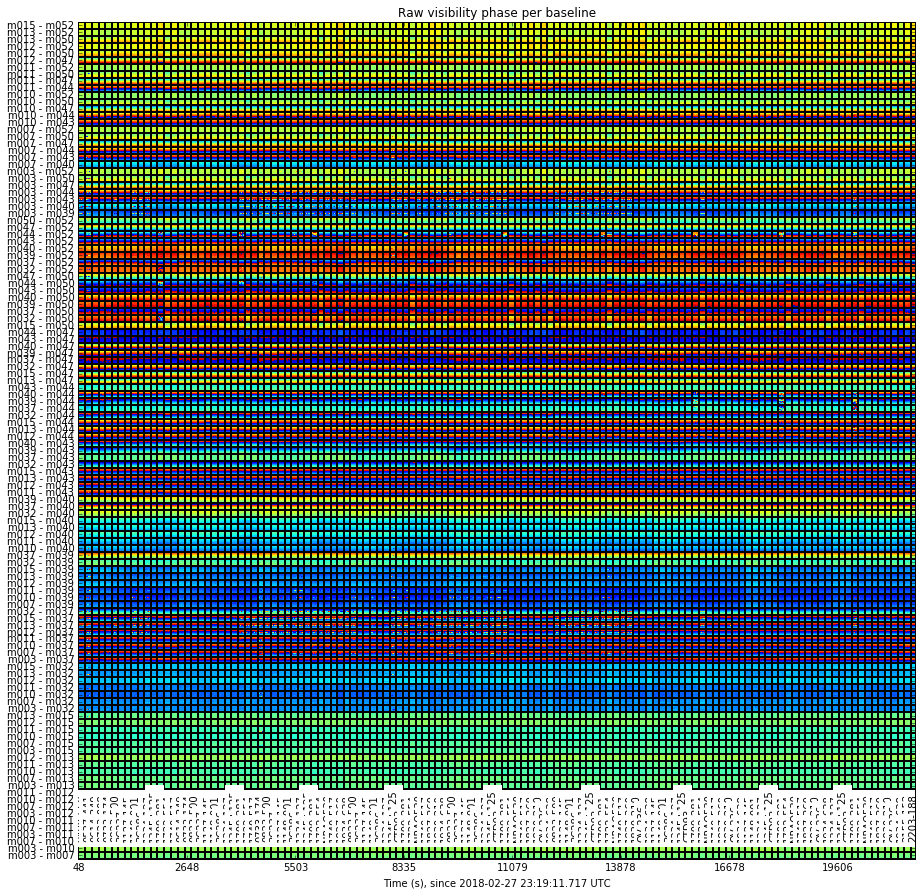

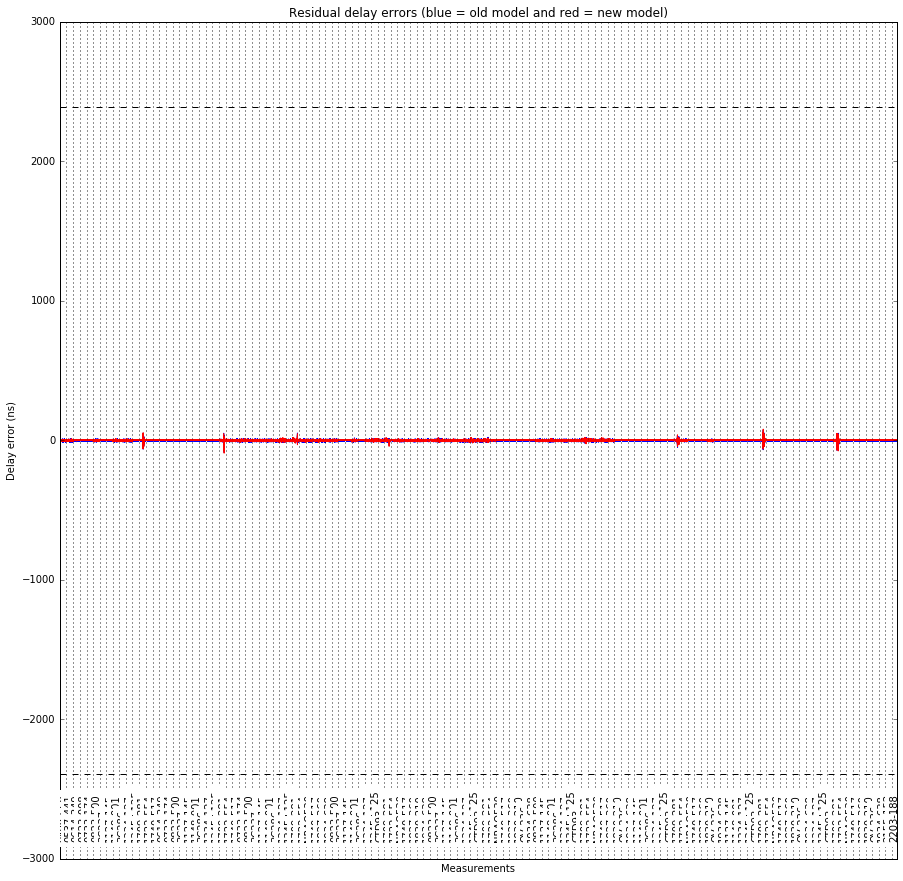

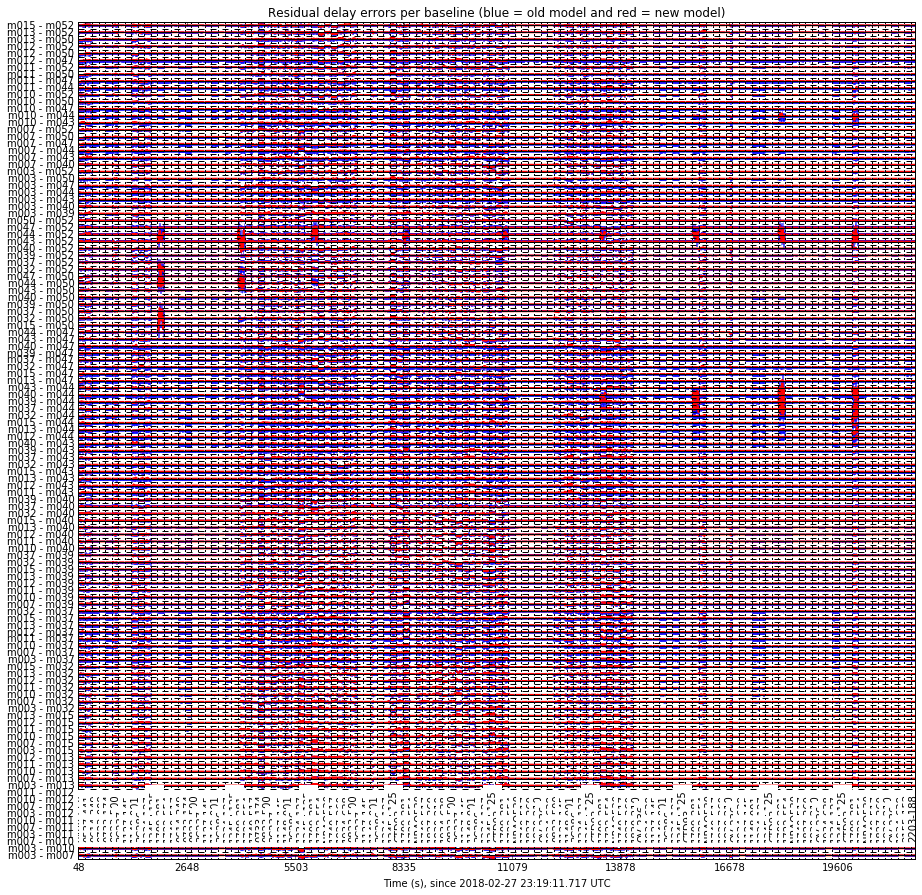

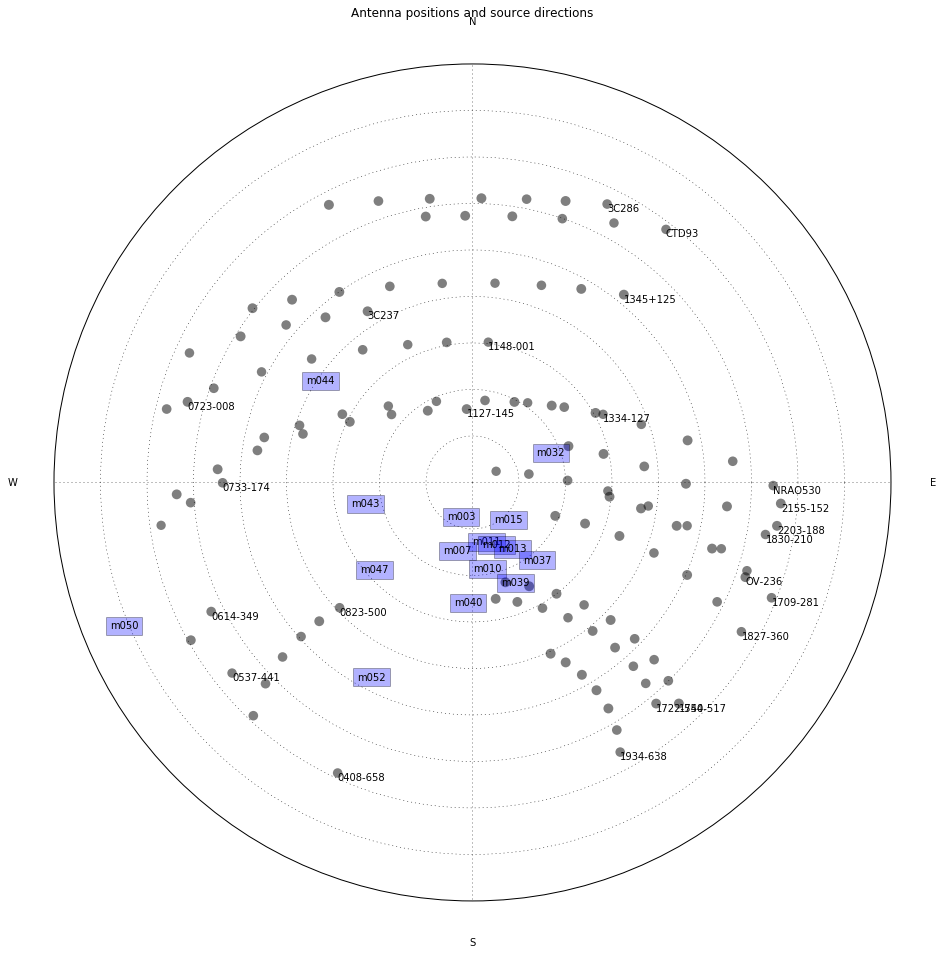

In [9]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
 -a $ants $h5_filename



Loading and processing data...

DEBUG: Found int_time=7.9966169712 in telstate['sdp_l0_int_time']
DEBUG: Found scale_factor_timestamp=1712000000.0 in telstate[u'i0_scale_factor_timestamp']
DEBUG: Found sync_time=1519731275.0 in telstate[u'i0_sync_time']
DEBUG: Found n_chans=4096 in telstate['sdp_l0_n_chans']
DEBUG: Found bandwidth=856000000.0 in telstate['sdp_l0_bandwidth']
DEBUG: Found center_freq=1284000000.0 in telstate['sdp_l0_center_freq']
antennas (16): m003, m007, m010, m011, m012 (*ref*), m013, m015, m032, m037, m039, m040, m043, m044, m047, m050, m052 [pol V]
baselines (120): 0-1 0-2 1-2 0-3 1-3 2-3 0-4 1-4 2-4 3-4 0-5 1-5 2-5 3-5 4-5 0-6 1-6 2-6 3-6 4-6 5-6 0-7 1-7 2-7 3-7 4-7 5-7 6-7 0-8 1-8 2-8 3-8 4-8 5-8 6-8 7-8 1-9 2-9 3-9 4-9 5-9 6-9 7-9 8-9 2-10 3-10 4-10 5-10 6-10 7-10 8-10 9-10 3-11 4-11 5-11 6-11 7-11 8-11 9-11 10-11 4-12 5-12 6-12 7-12 8-12 9-12 10-12 11-12 5-13 6-13 7-13 8-13 9-13 10-13 11-13 12-13 6-14 7-14 8-14 9-14 10-14 11-14 12-14 13-14 7-15 8-15 9-15 10-15 

scan  19 (  15 samples) 0.040 0.036 0.034 0.028 0.044 0.043 0.023 0.048 0.045 0.024 0.030 0.052 0.056 0.027 0.030 0.044 0.037 0.059 0.039 0.056 0.044 0.021 0.015 0.014 0.013 0.016 0.022 0.032 0.030 0.056 0.053 0.027 0.047 0.038 0.045 0.024 0.049 0.054 0.042 0.057 0.046 0.058 0.014 0.054 0.059 0.046 0.050 0.045 0.028 0.012 0.031 0.065 0.031 0.043 0.039 0.027 0.012 0.027 0.050 0.051 0.029 0.039 0.026 0.013 0.025 0.022 0.016 0.021 0.016 0.029 0.012 0.013 0.024 0.036 0.051 0.013 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.013 0.011 0.012 0.013 0.025 0.015 0.012 0.033 0.027 0.036 0.031 0.025 0.026 0.036 0.012 0.015 0.048 0.042 0.015 0.033 0.012 0.026 0.044 0.019 0.028 0.012 0.014 0.022 0.016 0.012 0.013 0.016 0.012 0.013 0.012 0.015 0.012 '3C286'
scan  20 (   6 samples) skipped 'slew'
scan  21 (  15 samples) 0.113 0.109 0.106 0.109 0.102 0.102 0.112 0.115 0.106 0.084 0.115 0.125 0.117 0.113 0.104 0.118 0.124 0.109 0.103 0.107 0.101 0.122 0.113 0.124 0.114 0.113 0.119 0.117 0.120 0.131 0.120

scan  41 (  16 samples) 0.058 0.061 0.056 0.058 0.053 0.059 0.056 0.061 0.060 0.062 0.060 0.059 0.062 0.057 0.063 0.056 0.056 0.057 0.057 0.054 0.058 0.057 0.057 0.059 0.056 0.059 0.060 0.057 0.055 0.058 0.061 0.059 0.056 0.060 0.054 0.058 0.059 0.065 0.057 0.061 0.062 0.059 0.060 0.060 0.059 0.056 0.057 0.059 0.056 0.058 0.055 0.059 0.059 0.061 0.063 0.059 0.061 0.058 0.062 0.059 0.061 0.064 0.059 0.060 0.060 0.063 0.059 0.062 0.063 0.060 0.062 0.060 0.063 0.060 0.063 0.064 0.059 0.061 0.060 0.062 0.058 0.063 0.063 0.063 0.058 0.057 0.058 0.056 0.060 0.060 0.062 0.058 0.058 0.055 0.060 0.062 0.061 0.059 0.057 0.057 0.057 0.059 0.060 0.059 0.057 0.060 0.061 0.063 0.061 0.060 0.061 0.060 0.060 0.058 0.063 0.060 0.058 0.063 0.061 0.057 '1148-001'
scan  42 (   6 samples) skipped 'slew'
scan  43 (  15 samples) 0.011 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.011 0.011 0.011 0.011 0.011 0.012 0.011 0.011 0.012 0.011 0.011 0.012 0.011 0.011 0.011 0.

scan  63 (  15 samples) 0.105 0.120 0.100 0.103 0.097 0.097 0.102 0.094 0.102 0.076 0.118 0.098 0.102 0.100 0.089 0.104 0.112 0.114 0.104 0.096 0.099 0.110 0.115 0.121 0.106 0.109 0.113 0.105 0.122 0.105 0.101 0.116 0.110 0.105 0.117 0.117 0.113 0.114 0.121 0.109 0.101 0.110 0.110 0.093 0.099 0.104 0.107 0.106 0.116 0.131 0.101 0.093 0.117 0.115 0.111 0.108 0.098 0.111 0.127 0.112 0.109 0.115 0.117 0.099 0.109 0.105 0.107 0.117 0.118 0.102 0.111 0.106 0.113 0.116 0.110 0.113 0.109 0.111 0.101 0.096 0.106 0.117 0.120 0.110 0.120 0.108 0.106 0.110 0.119 0.105 0.109 0.108 0.120 0.111 0.118 0.116 0.115 0.095 0.126 0.106 0.117 0.105 0.107 0.100 0.116 0.128 0.109 0.117 0.095 0.121 0.113 0.110 0.106 0.113 0.110 0.089 0.112 0.094 0.126 0.117 '1148-001'
scan  64 (   6 samples) skipped 'slew'
scan  65 (  15 samples) 0.054 0.078 0.069 0.061 0.053 0.060 0.068 0.067 0.055 0.050 0.081 0.070 0.058 0.061 0.056 0.068 0.067 0.057 0.045 0.051 0.057 0.075 0.063 0.074 0.062 0.067 0.077 0.053 0.084 0.074 0.

scan  85 (  15 samples) 0.026 0.028 0.027 0.027 0.027 0.027 0.028 0.027 0.026 0.025 0.028 0.028 0.030 0.028 0.028 0.026 0.027 0.027 0.025 0.027 0.027 0.027 0.027 0.027 0.027 0.027 0.028 0.027 0.026 0.026 0.028 0.028 0.027 0.028 0.028 0.026 0.027 0.029 0.029 0.030 0.029 0.029 0.028 0.026 0.027 0.026 0.026 0.027 0.025 0.027 0.027 0.028 0.029 0.028 0.030 0.027 0.028 0.027 0.028 0.027 0.028 0.028 0.027 0.027 0.028 0.029 0.027 0.028 0.030 0.028 0.029 0.028 0.029 0.027 0.030 0.029 0.028 0.028 0.028 0.029 0.027 0.029 0.029 0.029 0.028 0.027 0.029 0.025 0.027 0.027 0.029 0.027 0.027 0.026 0.027 0.028 0.028 0.027 0.027 0.026 0.028 0.028 0.028 0.028 0.027 0.029 0.028 0.031 0.028 0.028 0.028 0.029 0.028 0.026 0.030 0.028 0.027 0.030 0.028 0.026 '3C237'
scan  86 (   5 samples) skipped 'slew'
scan  87 (  16 samples) 0.033 0.036 0.035 0.034 0.033 0.034 0.034 0.034 0.036 0.034 0.035 0.034 0.037 0.035 0.035 0.033 0.033 0.035 0.034 0.034 0.035 0.034 0.035 0.037 0.035 0.035 0.037 0.034 0.033 0.033 0.034

scan 107 (  15 samples) 0.063 0.059 0.068 0.068 0.062 0.062 0.060 0.076 0.063 0.044 0.088 0.085 0.065 0.064 0.056 0.085 0.058 0.072 0.056 0.050 0.063 0.069 0.065 0.071 0.059 0.062 0.064 0.060 0.070 0.078 0.082 0.084 0.076 0.062 0.058 0.067 0.079 0.075 0.062 0.062 0.065 0.062 0.068 0.055 0.062 0.062 0.061 0.056 0.070 0.076 0.065 0.075 0.080 0.074 0.075 0.075 0.078 0.077 0.066 0.069 0.063 0.061 0.060 0.090 0.067 0.068 0.070 0.068 0.077 0.066 0.076 0.084 0.082 0.077 0.066 0.072 0.065 0.057 0.059 0.069 0.071 0.089 0.080 0.082 0.079 0.068 0.077 0.076 0.074 0.077 0.086 0.079 0.066 0.080 0.080 0.076 0.072 0.077 0.076 0.062 0.085 0.076 0.071 0.067 0.071 0.077 0.079 0.076 0.067 0.063 0.070 0.070 0.075 0.067 0.075 0.070 0.063 0.067 0.072 0.071 '1827-360'
scan 108 (   3 samples) skipped 'slew'
scan 109 (  15 samples) 0.074 0.094 0.087 0.091 0.081 0.071 0.091 0.103 0.055 0.053 0.091 0.103 0.083 0.075 0.062 0.092 0.100 0.086 0.069 0.066 0.073 0.091 0.098 0.112 0.095 0.108 0.108 0.101 0.089 0.113 0.

scan 129 (  15 samples) 0.093 0.096 0.096 0.087 0.093 0.075 0.101 0.107 0.091 0.078 0.110 0.118 0.093 0.094 0.082 0.117 0.109 0.102 0.084 0.088 0.079 0.112 0.114 0.131 0.119 0.126 0.127 0.122 0.137 0.133 0.113 0.113 0.111 0.070 0.086 0.102 0.118 0.091 0.095 0.091 0.097 0.104 0.112 0.089 0.099 0.110 0.116 0.105 0.121 0.139 0.108 0.114 0.144 0.134 0.124 0.105 0.112 0.113 0.133 0.108 0.133 0.143 0.122 0.103 0.154 0.208 0.231 0.099 0.102 0.104 0.104 0.101 0.105 0.134 0.107 0.136 0.039 0.049 0.039 0.042 0.075 0.103 0.131 0.085 0.117 0.111 0.110 0.101 0.122 0.430 0.107 0.101 0.099 0.109 0.136 0.126 0.104 0.062 0.139 0.108 0.149 0.133 0.111 0.073 0.116 0.155 0.161 0.115 0.052 0.112 0.135 0.103 0.042 0.120 0.095 0.042 0.107 0.041 0.114 0.115 '1709-281'
scan 130 (   5 samples) skipped 'slew'
scan 131 (  15 samples) 0.037 0.039 0.043 0.040 0.041 0.041 0.040 0.043 0.044 0.040 0.048 0.045 0.045 0.045 0.041 0.043 0.038 0.040 0.042 0.039 0.045 0.045 0.040 0.039 0.042 0.040 0.046 0.042 0.044 0.048 0.

scan 151 (  15 samples) 0.074 0.094 0.066 0.063 0.055 0.066 0.069 0.078 0.069 0.029 0.074 0.064 0.070 0.057 0.049 0.071 0.065 0.084 0.062 0.071 0.073 0.067 0.033 0.048 0.059 0.063 0.070 0.076 0.075 0.075 0.090 0.059 0.067 0.034 0.082 0.073 0.069 0.051 0.079 0.073 0.073 0.080 0.043 0.080 0.087 0.079 0.081 0.080 0.060 0.020 0.072 0.096 0.058 0.051 0.064 0.075 0.076 0.061 0.071 0.072 0.059 0.058 0.061 0.052 0.049 0.060 0.040 0.056 0.079 0.070 0.037 0.065 0.067 0.067 0.089 0.029 0.013 0.013 0.014 0.019 0.029 0.015 0.014 0.046 0.014 0.037 0.049 0.065 0.018 0.014 0.075 0.080 0.083 0.074 0.080 0.066 0.066 0.013 0.015 0.073 0.065 0.061 0.076 0.018 0.018 0.078 0.056 0.059 0.015 0.040 0.077 0.080 0.023 0.020 0.076 0.015 0.029 0.015 0.028 0.016 '3C286'
scan 152 (   7 samples) skipped 'slew'
scan 153 (  15 samples) 0.112 0.111 0.083 0.084 0.105 0.098 0.085 0.098 0.108 0.075 0.081 0.096 0.108 0.094 0.077 0.086 0.100 0.099 0.100 0.104 0.104 0.121 0.105 0.125 0.116 0.113 0.117 0.114 0.076 0.090 0.104

scan 173 (  15 samples) 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.011 0.011 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.012 0.013 0.012 0.013 0.013 0.012 0.012 0.012 0.012 0.011 0.012 0.013 0.013 0.012 0.011 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.011 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.013 0.012 0.012 0.012 0.012 0.012 0.012 0.013 0.012 0.012 0.013 0.012 0.012 '1934-638'
scan 174 (  10 samples) skipped 'slew'
scan 175 (  15 samples) 0.044 0.036 0.058 0.034 0.034 0.034 0.035 0.052 0.038 0.034 0.036 0.071 0.040 0.036 0.036 0.034 0.036 0.035 0.034 0.036 0.035 0.035 0.065 0.037 0.035 0.037 0.038 0.036 0.039 0.083 0.

scan 195 (  15 samples) 0.027 0.025 0.025 0.024 0.024 0.025 0.031 0.051 0.025 0.025 0.025 0.026 0.026 0.025 0.038 0.024 0.026 0.025 0.024 0.043 0.026 0.026 0.029 0.025 0.024 0.062 0.031 0.028 0.024 0.024 0.025 0.025 0.045 0.027 0.026 0.040 0.025 0.026 0.025 0.027 0.026 0.025 0.026 0.026 0.024 0.023 0.038 0.026 0.025 0.025 0.025 0.024 0.025 0.026 0.026 0.025 0.025 0.025 0.026 0.024 0.026 0.026 0.025 0.025 0.025 0.026 0.024 0.026 0.026 0.025 0.026 0.025 0.026 0.025 0.026 0.027 0.025 0.025 0.025 0.026 0.024 0.025 0.025 0.026 0.024 0.024 0.025 0.023 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.025 0.026 0.025 0.024 0.026 0.025 0.025 0.025 0.024 0.024 0.026 0.026 0.026 0.025 0.025 0.025 0.025 0.025 0.024 0.027 0.025 0.024 0.026 0.025 0.024 '1827-360'
scan 196 (   4 samples) skipped 'slew'
scan 197 (  15 samples) 0.039 0.034 0.039 0.035 0.041 0.037 0.035 0.033 0.039 0.034 0.048 0.051 0.050 0.036 0.036 0.037 0.049 0.050 0.045 0.040 0.034 0.062 0.051 0.059 0.048 0.050 0.064 0.060 0.049 0.051 0.

scan 217 (  16 samples) 0.027 0.025 0.026 0.025 0.025 0.026 0.025 0.025 0.026 0.025 0.026 0.026 0.027 0.026 0.025 0.025 0.025 0.025 0.025 0.026 0.026 0.026 0.026 0.026 0.025 0.027 0.028 0.027 0.025 0.025 0.026 0.025 0.025 0.026 0.025 0.037 0.026 0.027 0.026 0.027 0.027 0.027 0.030 0.027 0.025 0.024 0.025 0.025 0.025 0.025 0.024 0.025 0.026 0.027 0.028 0.027 0.028 0.027 0.028 0.026 0.028 0.029 0.028 0.028 0.028 0.029 0.027 0.027 0.028 0.027 0.027 0.028 0.028 0.026 0.027 0.028 0.028 0.028 0.028 0.030 0.028 0.028 0.028 0.029 0.026 0.026 0.026 0.025 0.026 0.026 0.026 0.028 0.026 0.025 0.026 0.027 0.026 0.029 0.025 0.024 0.026 0.027 0.026 0.028 0.025 0.027 0.029 0.028 0.029 0.026 0.028 0.027 0.029 0.025 0.027 0.029 0.026 0.030 0.026 0.026 'NRAO530'
scan 218 (   8 samples) skipped 'slew'
scan 219 (  15 samples) 0.025 0.027 0.026 0.025 0.025 0.026 0.026 0.026 0.027 0.027 0.027 0.027 0.027 0.026 0.027 0.025 0.025 0.026 0.025 0.026 0.027 0.026 0.026 0.026 0.026 0.026 0.027 0.025 0.025 0.025 0.0

scan 239 (  15 samples) 0.025 0.026 0.026 0.026 0.025 0.026 0.025 0.026 0.027 0.028 0.026 0.027 0.027 0.028 0.028 0.025 0.025 0.026 0.025 0.026 0.027 0.026 0.026 0.026 0.026 0.026 0.026 0.025 0.025 0.026 0.026 0.026 0.026 0.026 0.025 0.026 0.026 0.027 0.027 0.027 0.027 0.026 0.027 0.026 0.026 0.025 0.025 0.026 0.025 0.025 0.025 0.026 0.028 0.028 0.029 0.027 0.028 0.028 0.028 0.026 0.029 0.029 0.028 0.029 0.029 0.030 0.027 0.027 0.029 0.028 0.029 0.028 0.029 0.026 0.027 0.028 0.029 0.029 0.029 0.030 0.028 0.029 0.029 0.030 0.027 0.026 0.027 0.025 0.026 0.027 0.026 0.028 0.027 0.024 0.027 0.028 0.027 0.029 0.026 0.025 0.026 0.028 0.027 0.029 0.026 0.028 0.029 0.029 0.030 0.027 0.028 0.028 0.030 0.026 0.028 0.030 0.027 0.030 0.027 0.026 'NRAO530'
scan 240 (  10 samples) skipped 'slew'
scan 241 (  15 samples) 0.045 0.027 0.027 0.025 0.025 0.026 0.075 0.083 0.032 0.028 0.043 0.060 0.030 0.027 0.070 0.030 0.039 0.027 0.026 0.066 0.036 0.051 0.056 0.027 0.026 0.126 0.100 0.051 0.073 0.084 0.0

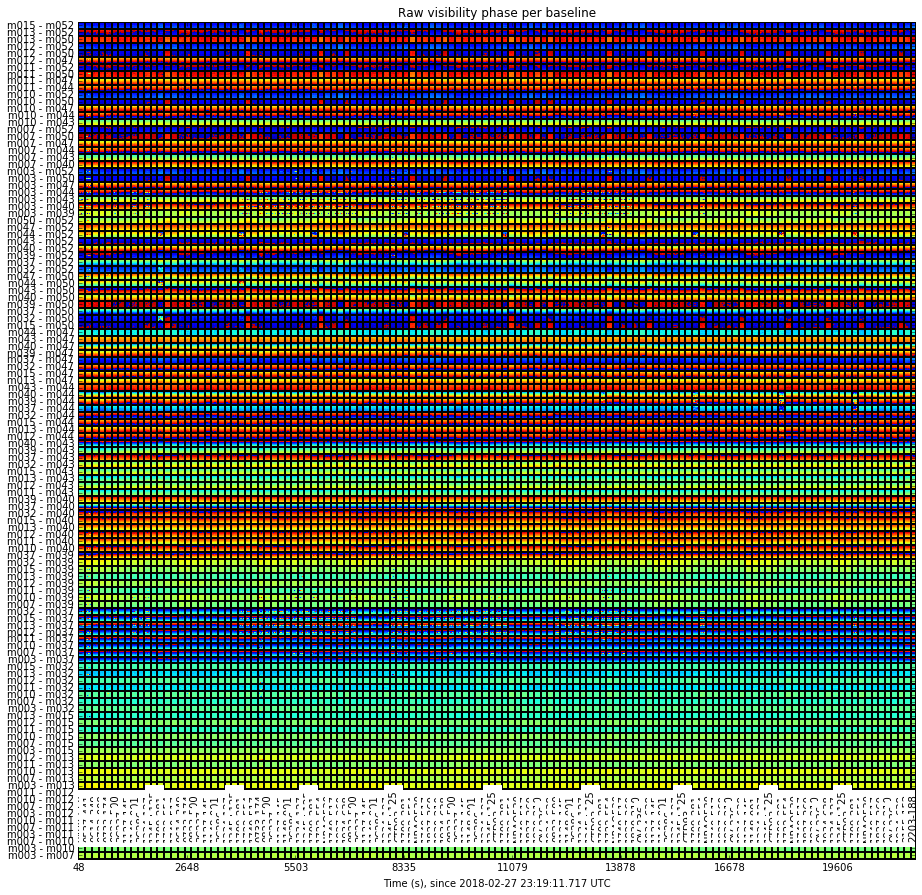

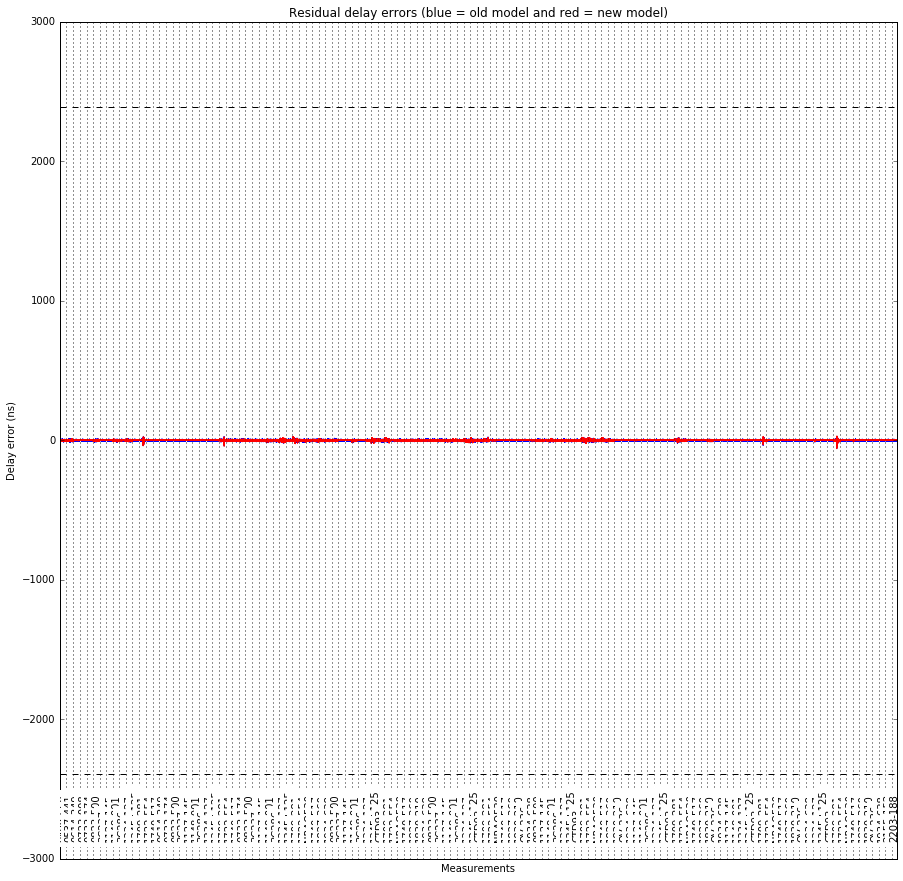

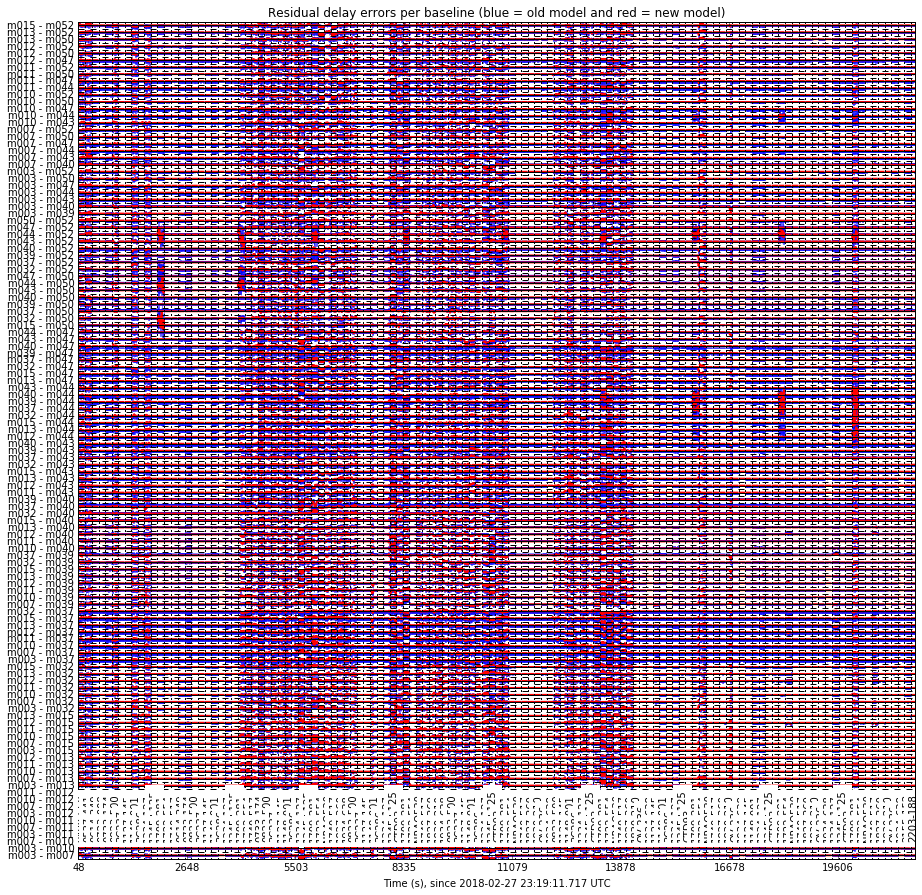

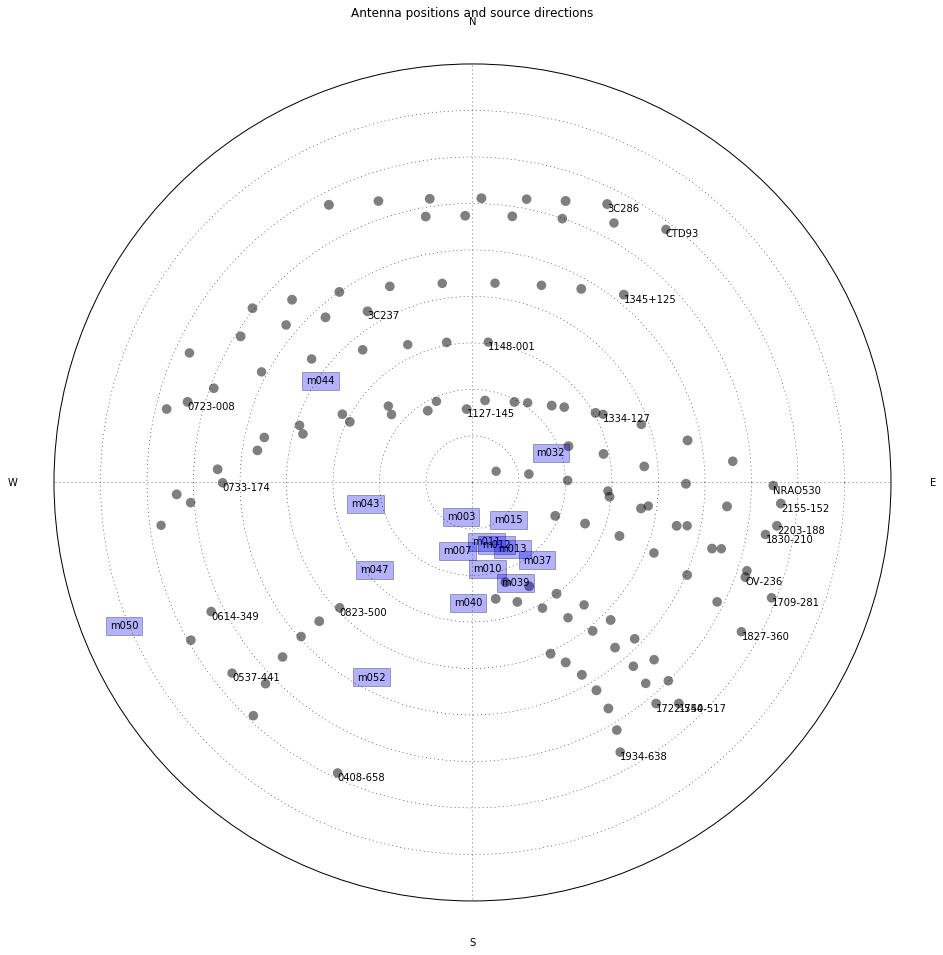

In [10]:
figure(1,figsize=(15,15))
figure(2,figsize=(15,15))
figure(3,figsize=(15,15))
figure(4,figsize=(15,15))
%run -e /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
 -a $ants $h5_filename


In [11]:
res_h = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'H' -r $ref_ant \
  -a $ants  $h5_filename
print "Done H"

Done H


In [12]:
res_v = !python /var/kat/katsdpscripts/reduction/baseline_cal_reduction.py -f 2200,2914 -p 'V' -r $ref_ant \
  -a $ants $h5_filename
print "Done V"

Done V


In [13]:
delays_h = {}
for i,r in enumerate(res_h):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_h[ant] = {}
        delays_h[ant]['E'] = float(res_h[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['N'] = float(res_h[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['U'] = float(res_h[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_h[ant]['D'] = float(res_h[i+5].split(':')[1].lstrip().split(' ')[0])
delays_h

{'m003': {'D': 5872.781, 'E': -66.499, 'N': -202.283, 'U': 0.858},
 'm007': {'D': 5888.631, 'E': -89.563, 'N': -402.727, 'U': 2.359},
 'm010': {'D': 5881.442, 'E': 88.11, 'N': -511.861, 'U': 3.79},
 'm011': {'D': 5882.336, 'E': 84.025, 'N': -352.081, 'U': 2.748},
 'm012': {'D': 5863.332, 'E': 140.025, 'N': -368.269, 'U': 3.051},
 'm013': {'D': 5863.483, 'E': 236.784, 'N': -393.462, 'U': 3.728},
 'm015': {'D': 5916.987, 'E': 210.64, 'N': -219.152, 'U': 2.34},
 'm032': {'D': 5864.861, 'E': 461.269, 'N': 175.501, 'U': -0.04},
 'm037': {'D': 5863.752, 'E': 380.27, 'N': -459.306, 'U': 4.803},
 'm039': {'D': 5872.333, 'E': 253.747, 'N': -592.135, 'U': 5.074},
 'm040': {'D': 5875.657, 'E': -26.839, 'N': -712.206, 'U': 4.443},
 'm043': {'D': 5856.073, 'E': -629.843, 'N': -128.328, 'U': -2.157},
 'm044': {'D': 5867.443, 'E': -896.152, 'N': 600.498, 'U': -8.047},
 'm047': {'D': 5867.767, 'E': -578.279, 'N': -517.295, 'U': 0.198},
 'm050': {'D': 5885.963, 'E': -2052.336, 'N': -843.712, 'U': -2.05

In [14]:
delays_v = {}
for i,r in enumerate(res_v):
    if r.startswith('Antenna'):
        ant = r[8:12]
        delays_v[ant] = {}
        delays_v[ant]['E'] = float(res_v[i+2].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['N'] = float(res_v[i+3].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['U'] = float(res_v[i+4].split(':')[1].lstrip().split(' ')[0])
        delays_v[ant]['D'] = float(res_v[i+5].split(':')[1].lstrip().split(' ')[0])
delays_v

{'m003': {'D': 5874.412, 'E': -66.494, 'N': -202.28, 'U': 0.869},
 'm007': {'D': 5889.379, 'E': -89.56, 'N': -402.724, 'U': 2.373},
 'm010': {'D': 5882.956, 'E': 88.106, 'N': -511.86, 'U': 3.808},
 'm011': {'D': 5883.219, 'E': 84.026, 'N': -352.08, 'U': 2.747},
 'm012': {'D': 5864.346, 'E': 140.025, 'N': -368.269, 'U': 3.051},
 'm013': {'D': 5864.229, 'E': 236.781, 'N': -393.461, 'U': 3.726},
 'm015': {'D': 5918.594, 'E': 210.641, 'N': -219.153, 'U': 2.323},
 'm032': {'D': 5865.577, 'E': 461.274, 'N': 175.502, 'U': -0.053},
 'm037': {'D': 5864.611, 'E': 380.263, 'N': -459.307, 'U': 4.793},
 'm039': {'D': 5873.763, 'E': 253.732, 'N': -592.134, 'U': 5.087},
 'm040': {'D': 5876.438, 'E': -26.847, 'N': -712.205, 'U': 4.466},
 'm043': {'D': 5857.703, 'E': -629.836, 'N': -128.321, 'U': -2.141},
 'm044': {'D': 5868.203, 'E': -896.151, 'N': 600.5, 'U': -8.045},
 'm047': {'D': 5868.551, 'E': -578.281, 'N': -517.292, 'U': 0.216},
 'm050': {'D': 5887.567, 'E': -2052.331, 'N': -843.705, 'U': -2.03

# Cross check between polarizations for derived positions

In [15]:
for a in sorted(delays_v):
    print a,
    print("diff E %06.3f") %(delays_h[a]['E'] - delays_v[a]['E']),
    print("diff N %06.3f") %(delays_h[a]['N'] - delays_v[a]['N']),
    print("diff U %06.3f") %(delays_h[a]['U'] - delays_v[a]['U']),
    print("diff D %06.3f") %(delays_h[a]['D'] - delays_v[a]['D'])
    
# expect differences between E,N and U less than 1cm and Delays less than 3m 

m003 diff E -0.005 diff N -0.003 diff U -0.011 diff D -1.631
m007 diff E -0.003 diff N -0.003 diff U -0.014 diff D -0.748
m010 diff E 00.004 diff N -0.001 diff U -0.018 diff D -1.514
m011 diff E -0.001 diff N -0.001 diff U 00.001 diff D -0.883
m012 diff E 00.000 diff N 00.000 diff U 00.000 diff D -1.014
m013 diff E 00.003 diff N -0.001 diff U 00.002 diff D -0.746
m015 diff E -0.001 diff N 00.001 diff U 00.017 diff D -1.607
m032 diff E -0.005 diff N -0.001 diff U 00.013 diff D -0.716
m037 diff E 00.007 diff N 00.001 diff U 00.010 diff D -0.859
m039 diff E 00.015 diff N -0.001 diff U -0.013 diff D -1.430
m040 diff E 00.008 diff N -0.001 diff U -0.023 diff D -0.781
m043 diff E -0.007 diff N -0.007 diff U -0.016 diff D -1.630
m044 diff E -0.001 diff N -0.002 diff U -0.002 diff D -0.760
m047 diff E 00.002 diff N -0.003 diff U -0.018 diff D -0.784
m050 diff E -0.005 diff N -0.007 diff U -0.020 diff D -1.604
m052 diff E 00.003 diff N -0.005 diff U -0.014 diff D -0.756


In [16]:
# write solutions to file
matchRe = re.findall('[0-9]{10,}', h5_filename)
filename='delay_file_'+''.join(matchRe)+'.txt'

with open(filename, 'w') as f:
    for h,v in zip(delays_h,delays_v):
        print >> f, h,v, mean([delays_h[h]['E'],delays_v[v]['E']]) , \
                    mean([delays_h[h]['N'],delays_v[v]['N']]), \
                    mean([delays_h[h]['U'],delays_v[v]['U']]), \
                    delays_h[h]['D'],delays_v[v]['D']
    f.close()

In [17]:
# sort delay file by antenna name and load antennaLOC
sample = open(filename, 'r')
sorter = csv.reader(sample, delimiter=' ')
sort = sorted(sorter, key=operator.itemgetter(1))

with open('ant_loc.csv', 'r') as f:
    tocs = f.read()

In [18]:
cols = ['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
df = pd.DataFrame(columns=cols)
for line in sort:
    p = re.compile(line[0]+',\s+\d{4}\.\d{1,3}')
    toc = float(p.search(tocs).group()[6:])
    df = df.append(pd.Series(
                             [
                                line[0],
                                line[-2],
                                line[2],
                                line[3],
                                line[4], 
                                toc
                             ], 
                              index=['Ants', 'Delay', 'East', 'North', 'UP', 'TOC']
                            ), ignore_index = True)

In [19]:
deltaTOC, deltaUP = [], []
deltaTOC.append(0)
deltaUP.append(0)
for i in range(1, len(df.TOC[1:])+1):
    deltaTOC.append(df.TOC[i] - df.TOC[i-1])
    deltaUP.append(float(df.UP[i]) - float(df.UP[i-1]))

em  = [' ' for i in range(len(deltaUP))]!scp:
df[' '] =  pd.Series(em,  index = df.index)

df['delta UP']  = pd.Series(deltaUP,  index = df.index)
df['delta TOC'] = pd.Series(deltaTOC, index = df.index)

print('\nDelay Solutions and antenna locations\n')
df


Delay Solutions and antenna locations



,Ants,Delay,East,North,UP,TOC,,delta UP,delta TOC
0,m003,5872.781,-66.4965,-202.2815,0.8635,1051.754,,0.0000,0.000
1,m007,5888.631,-89.5615,-402.7255,2.366,1053.092,,1.5025,1.338
2,m010,5881.442,88.108,-511.8605,3.799,1054.756,,1.4330,1.664
3,m011,5882.336,84.0255,-352.0805,2.7475,1053.521,,-1.0515,-1.235
4,m012,5863.332,140.025,-368.269,3.051,1053.730,,0.3035,0.209
5,m013,5863.483,236.7825,-393.4615,3.727,1054.658,,0.6760,0.928
6,m015,5916.987,210.6405,-219.1525,2.3315,1053.204,,-1.3955,-1.454
7,m032,5864.861,461.2715,175.5015,-0.0465,1050.831,,-2.3780,-2.373
8,m037,5863.752,380.2665,-459.3065,4.798,1055.633,,4.8445,4.802
9,m039,5872.333,253.7395,-592.1345,5.0805,1055.914,,0.2825,0.281


In [20]:
# send file to ops server to process and push to github

opsServer='ops.kat.ac.za'
rPath='/home/kat/ops_team_sw/utilities/update_delay_models'
cmd = "sshpass -p {} scp -r {} kat@{}:{}".format('kat', filename, opsServer, rPath)
system(cmd)


32512